In [ ]:
import math
import random
import scipy
import statistics
import seaborn as sns
import numpy as np
import scipy.stats
from scipy import stats
from scipy.stats import f_oneway
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.formula.api import ols
import statsmodels.stats.multicomp as mc

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [21]:
Table1 = pd.read_csv('drive/My Drive/Lab4_Data.csv', sep=',', na_values=".")
Table1

,a,b,c,Time
0,-1,-1,-1,2.51
1,1,-1,-1,2.57
2,-1,1,-1,1.98
3,-1,-1,1,2.05
4,1,1,-1,2.25
5,-1,1,1,1.65
6,1,-1,1,2.18
7,1,1,1,1.85
8,-1,-1,-1,2.31
9,1,-1,-1,2.41


In [22]:
aa=Table1[['a']].to_numpy()
bb=Table1[['b']].to_numpy()
cc=Table1[['c']].to_numpy()
AB=aa*bb
BC=bb*cc
AC=aa*cc
ABC=aa*bb*cc

In [23]:
Table1['ABC']=ABC
Table1['AB']=AB
Table1['BC']=BC
Table1['AC']=AC
X=Table1[['a', 'b', 'c', 'AB', 'BC', 'AC', 'ABC']]
X = sm.add_constant(X) # adding a constant
X

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


,const,a,b,c,AB,BC,AC,ABC
0,1.0,-1,-1,-1,1,1,1,-1
1,1.0,1,-1,-1,-1,1,-1,1
2,1.0,-1,1,-1,-1,-1,1,1
3,1.0,-1,-1,1,1,-1,-1,1
4,1.0,1,1,-1,1,-1,-1,-1
5,1.0,-1,1,1,-1,1,-1,-1
6,1.0,1,-1,1,-1,-1,1,-1
7,1.0,1,1,1,1,1,1,1
8,1.0,-1,-1,-1,1,1,1,-1
9,1.0,1,-1,-1,-1,1,-1,1


In [ ]:
Y=Table1[['Time']]
Y

,Time
0,2.51
1,2.57
2,1.98
3,2.05
4,2.25
5,1.65
6,2.18
7,1.85
8,2.31
9,2.41


In [ ]:
model = sm.OLS(Y, X)
res=model.fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:                   Time   R-squared:                       0.918
Model:                            OLS   Adj. R-squared:                  0.845
Method:                 Least Squares   F-statistic:                     12.72
Date:                Wed, 05 Oct 2022   Prob (F-statistic):           0.000914
Time:                        12:35:42   Log-Likelihood:                 19.241
No. Observations:                  16   AIC:                            -22.48
Df Residuals:                       8   BIC:                            -16.30
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.1444      0.026     83.435      0.0

/usr/local/lib/python3.7/dist-packages/scipy/stats/stats.py:1542: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=16
  "anyway, n=%i" % int(n))


In [ ]:
df=Table1
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16 entries, 0 to 15
Data columns (total 8 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   a       16 non-null     int64  
 1   b       16 non-null     int64  
 2   c       16 non-null     int64  
 3   Time    16 non-null     float64
 4   ABC     16 non-null     int64  
 5   AB      16 non-null     int64  
 6   BC      16 non-null     int64  
 7   AC      16 non-null     int64  
dtypes: float64(1), int64(7)
memory usage: 1.1 KB


In [ ]:
model = ols('Time ~ C(a) + C(b) + C(c) + C(a):C(b)+ C(b):C(c)+ C(a):C(c)+ C(a):C(b):C(c)', data=df).fit()
aov_table = sm.stats.anova_lm(model, typ=2)
aov_table

,sum_sq,df,F,PR(>F)
C(a),0.120756,1.0,11.425784,0.009639
C(b),0.375156,1.0,35.496747,0.000339
C(c),0.425756,1.0,40.284447,0.000221
C(a):C(b),0.006006,1.0,0.568303,0.472536
C(b):C(c),0.001806,1.0,0.170905,0.690168
C(a):C(c),0.011556,1.0,1.093436,0.326275
C(a):C(b):C(c),0.000006,1.0,0.000591,0.981195
Residual,0.084550,8.0,NaN,NaN


In [ ]:
eij=model.resid
eij

0     1.000000e-01
1     8.000000e-02
2    -1.050000e-01
3    -1.776357e-15
4     5.000000e-03
5    -3.500000e-02
6    -6.000000e-02
7    -1.000000e-01
8    -1.000000e-01
9    -8.000000e-02
10    1.050000e-01
11   -1.776357e-15
12   -5.000000e-03
13    3.500000e-02
14    6.000000e-02
15    1.000000e-01
dtype: float64

In [ ]:
N = len(eij)
c = list(range(0, N))
order = random.sample(c, N) 
print('order of observations/residuals is')
print(order)

order of observations/residuals is
[7, 15, 4, 13, 14, 10, 2, 12, 5, 3, 6, 1, 8, 11, 0, 9]


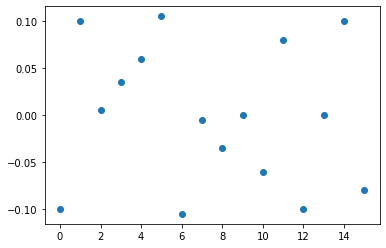

In [ ]:
eij=model.resid

x = c 
y = eij[order] 

plt.scatter(x, y)